In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import f1_score
import pickle
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [2]:
data_breast_cancer = datasets.load_breast_cancer(as_frame=True).frame

In [3]:
X = data_breast_cancer.drop('target', axis=1)
y = data_breast_cancer['target']
X = X[['mean texture', 'mean symmetry']]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
train_f1_scores = []
test_f1_scores = []

for max_depth in range(1, 10):
    tree_clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    tree_clf.fit(X_train, y_train)
    y_train_predict = tree_clf.predict(X_train)
    y_test_predict = tree_clf.predict(X_test)

    train_f1 = f1_score(y_train, y_train_predict)
    test_f1 = f1_score(y_test, y_test_predict)

    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)

print(train_f1_scores)
print(test_f1_scores)
sum_array = [train_f1_scores[i] + test_f1_scores[i] for i in range(len(train_f1_scores))]
print(sum_array)

[0.7539062500000001, 0.8211243611584327, 0.8211243611584327, 0.8464163822525598, 0.8710217755443886, 0.8965517241379309, 0.9215017064846417, 0.9413793103448277, 0.9598603839441536]
[0.6949152542372881, 0.7887323943661971, 0.7887323943661971, 0.7647058823529411, 0.7397260273972602, 0.7310344827586208, 0.7172413793103449, 0.7246376811594204, 0.6962962962962963]
[1.448821504237288, 1.6098567555246297, 1.6098567555246297, 1.611122264605501, 1.6107478029416489, 1.6275862068965519, 1.6387430857949865, 1.666016991504248, 1.65615668024045]


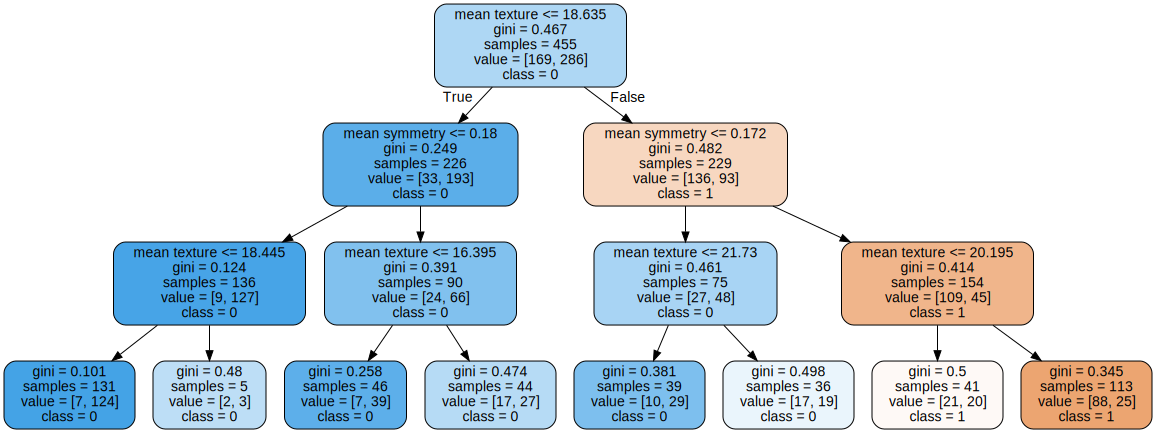

In [6]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)
file = 'bc.dot'
export_graphviz(tree_clf, out_file=file, rounded=True, filled=True,
                feature_names=X_train.columns, class_names=[str(element) for element in y_train.unique()])
graph = graphviz.Source.from_file(file)
graph.render('bc', format='png')
graph

In [7]:
tree_list = [3]
y_train_predict = tree_clf.predict(X_train)
y_test_predict = tree_clf.predict(X_test)
train_f1 = f1_score(y_train, y_train_predict)
test_f1 = f1_score(y_test, y_test_predict)
train_accuracy = tree_clf.score(X_train, y_train)
test_accuracy = tree_clf.score(X_test, y_test)
print(train_f1, test_f1, train_accuracy, test_accuracy)
tree_list.append(train_f1)
tree_list.append(test_f1)
tree_list.append(train_accuracy)
tree_list.append(test_accuracy)
print(tree_list)

0.8211243611584327 0.7887323943661971 0.7692307692307693 0.7368421052631579
[3, 0.8211243611584327, 0.7887323943661971, 0.7692307692307693, 0.7368421052631579]


In [8]:
with open('f1acc_tree.pkl', 'wb') as file:
    pickle.dump(tree_list, file)

<Axes: xlabel='x', ylabel='y'>

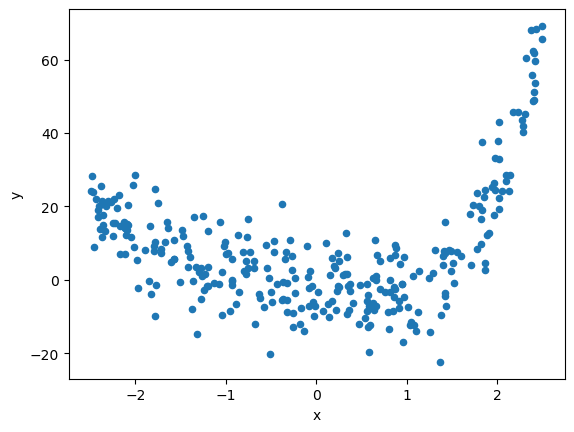

In [9]:
size = 300
X = np.random.rand(size) * 5 - 2.5
w4, w3, w2, w1, w0 = 1, 2 , 1, -4, 2
y = w4 * (X**4) + w3 * (X**3) + w2 * (X**2) + w1 * X + w0 + np.random.randn(size)* 8 - 4
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x', y='y')

In [10]:
df_train, df_test = train_test_split(df, train_size=0.8, random_state=42)

In [11]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(df_train.x.to_numpy().reshape(-1, 1), df_train.y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [12]:
train_mse_array = []
test_mse_array = []

for depth in range(1, 10):
    tree_reg = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree_reg.fit(df_train.x.to_numpy().reshape(-1, 1), df_train.y)
    y_train_predict = tree_reg.predict(df_train.x.to_numpy().reshape(-1, 1))
    train_mse = mean_squared_error(y_train_predict, df_train.y)
    train_mse_array.append(train_mse)

    y_test_predict = tree_reg.predict(df_test.x.to_numpy().reshape(-1, 1))
    test_mse = mean_squared_error(y_test_predict, df_test.y)
    test_mse_array.append(test_mse)

print(train_mse_array)
print(test_mse_array)
sum_array = [train_mse_array[i] - test_mse_array[i] for i in range (len(train_mse_array))]
print(sum_array)

[124.14762944010769, 80.2463582663554, 54.7160279247969, 48.81431331784382, 40.67169996314396, 35.09312905531818, 28.550696595528485, 24.012143228886483, 15.787890355422629]
[140.5450638762865, 124.33079975630449, 63.358600704248666, 72.25809650578864, 86.52423852504141, 94.76236569432291, 103.2447234440148, 113.56754716838829, 113.54830112035594]
[-16.3974344361788, -44.084441489949086, -8.642572779451768, -23.443783187944824, -45.852538561897454, -59.66923663900473, -74.69402684848632, -89.5554039395018, -97.76041076493331]


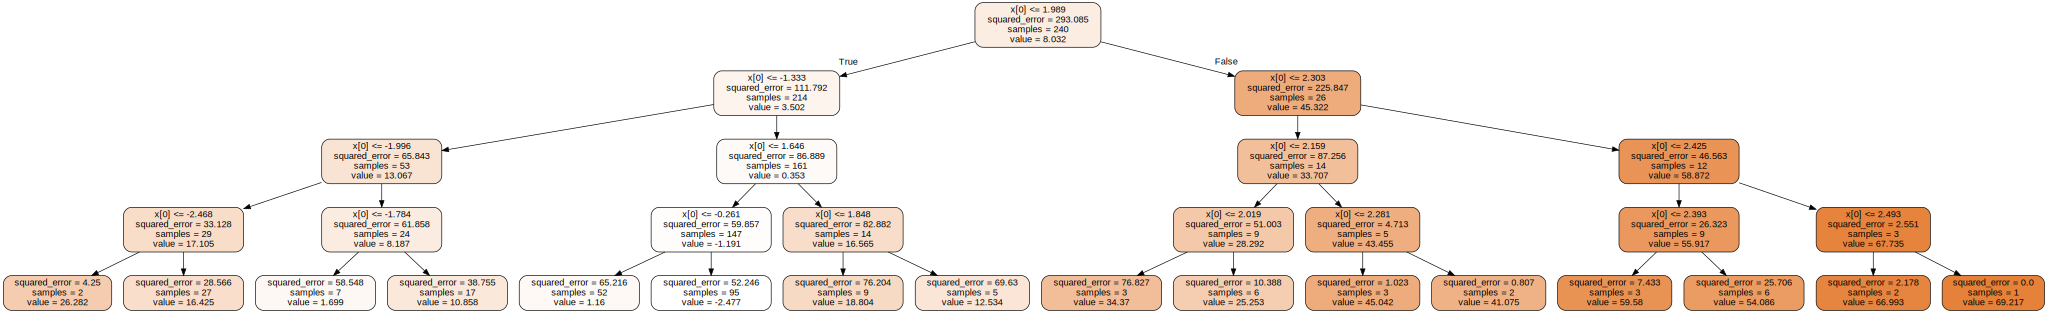

In [13]:
tree_reg = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg.fit(df_train.x.to_numpy().reshape(-1, 1), df_train.y)
file = 'reg.dot'
export_graphviz(tree_reg, out_file=file, rounded=True, filled=True)
graph = graphviz.Source.from_file(file)
graph.render('reg', format='png')
graph

In [14]:
tree_reg = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg.fit(df_train.x.to_numpy().reshape(-1, 1), df_train.y)
y_train_predict = tree_reg.predict(df_train.x.to_numpy().reshape(-1, 1))
train_mse = mean_squared_error(y_train_predict, df_train.y)
y_test_predict = tree_reg.predict(df_test.x.to_numpy().reshape(-1, 1))
test_mse = mean_squared_error(y_test_predict, df_test.y)
print(4, train_mse, test_mse)
mse_list = [4, train_mse, test_mse]
with open('mse_tree.pkl', 'wb') as file:
    pickle.dump(mse_list, file)

4 48.81431331784382 72.25809650578864
